c:\Users\admin\Desktop\venvs\alfa_bank\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


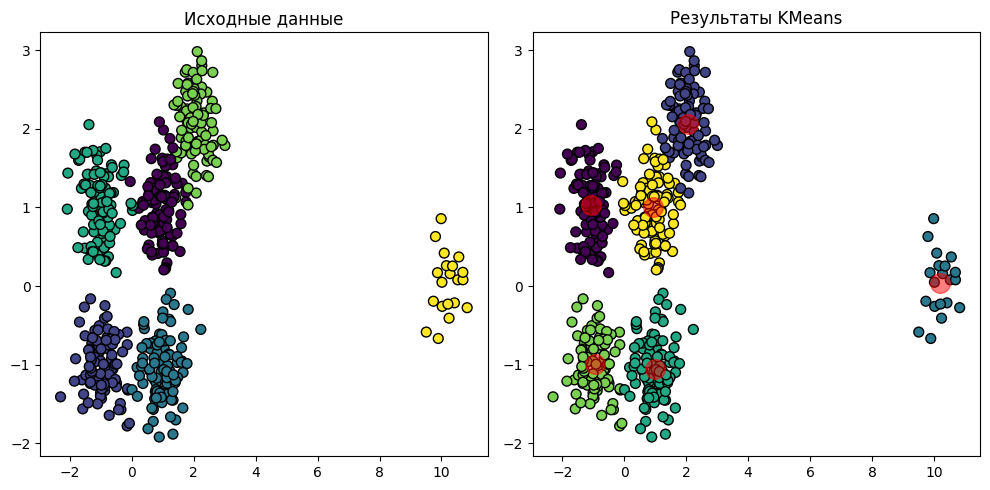

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Создаем искусственный датасет
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1], [2, 2], [10, 0]]  # Центры предполагаемых кластеров
cluster_std = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4]  # Стандартные отклонения кластеров
X, y = make_blobs(n_samples=[100, 100, 100, 100, 100, 20], centers=centers, cluster_std=cluster_std, random_state=42, shuffle=True)

# Визуализация исходного датасета
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Исходные данные')

# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Визуализация результатов кластеризации
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Результаты KMeans')

plt.tight_layout()
plt.show()


c:\Users\admin\Desktop\venvs\alfa_bank\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\Desktop\venvs\alfa_bank\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\Desktop\venvs\alfa_bank\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\Desktop\venvs\alfa_bank\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


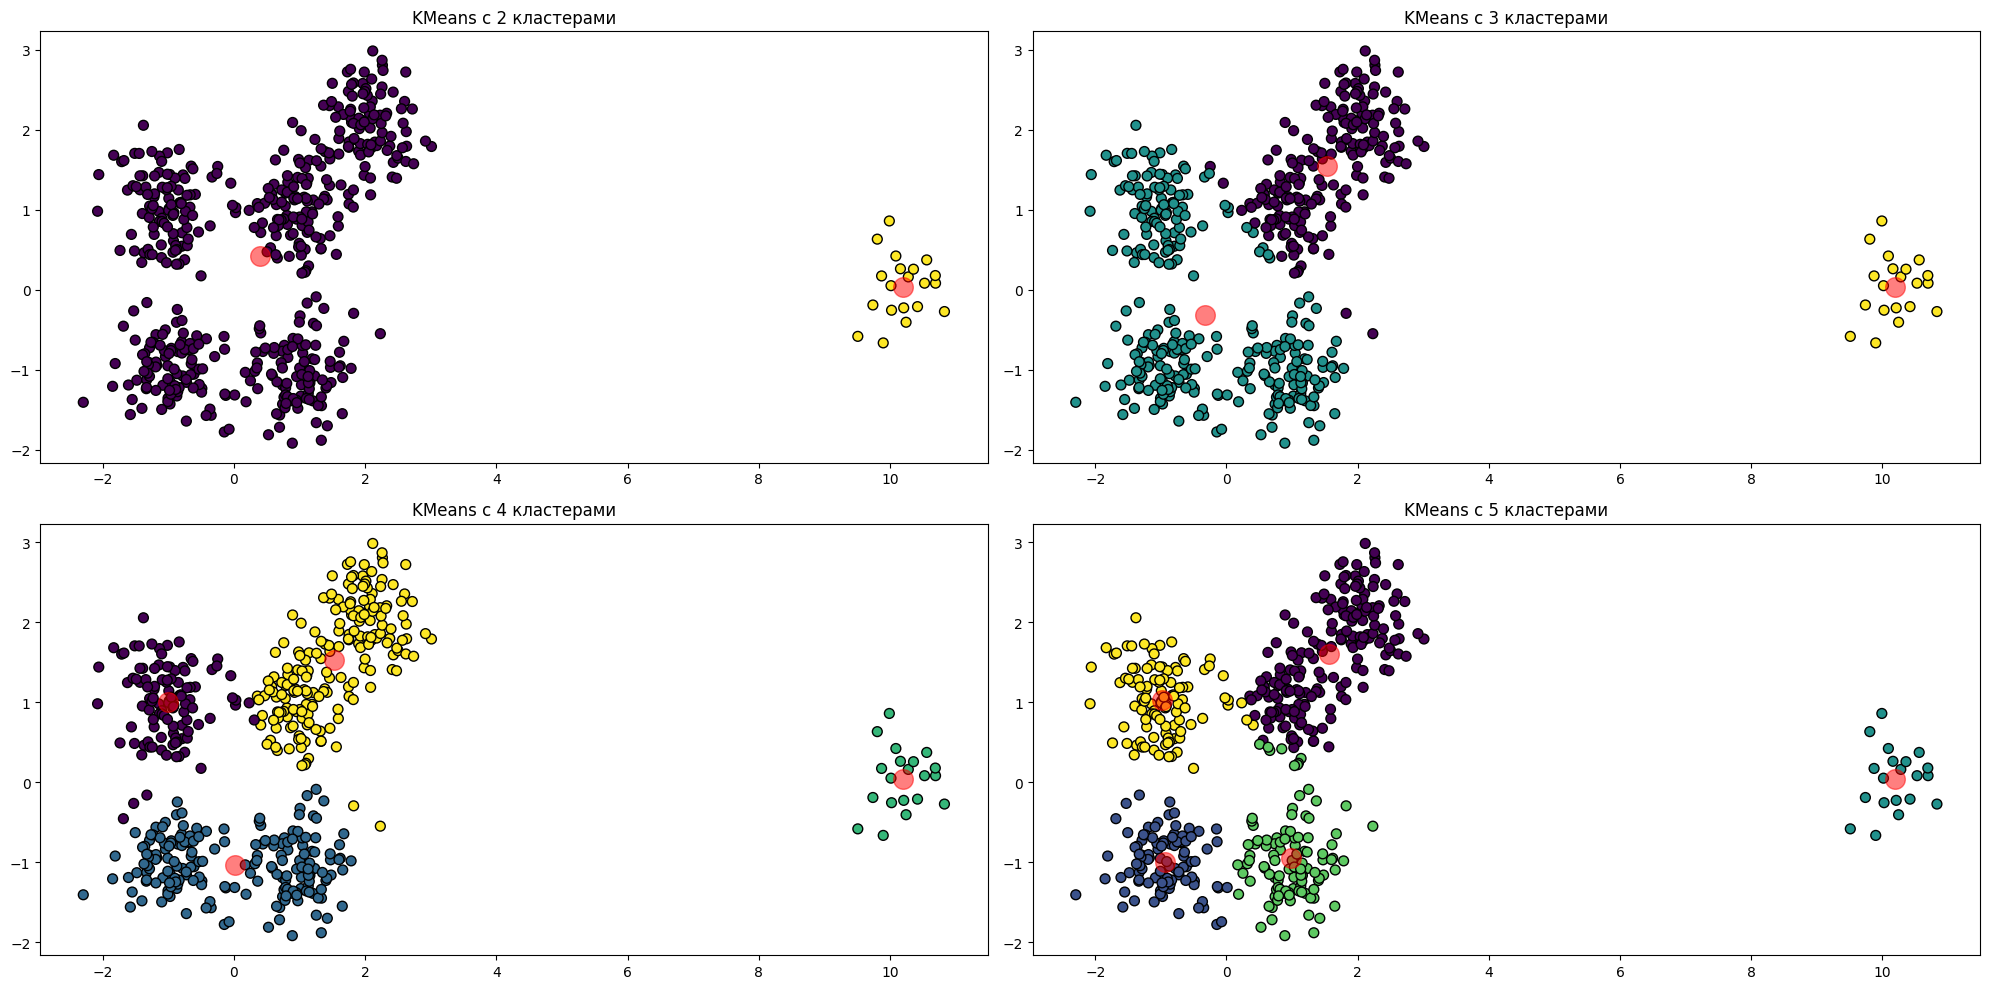

In [2]:
# Создание и визуализация результатов кластеризации для различного количества кластеров от 2 до 5
plt.figure(figsize=(20, 10))

for i, k in enumerate(range(2, 6), 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_

    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    plt.title(f'KMeans с {k} кластерами')

plt.tight_layout()
plt.show()


In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def reassign_small_clusters(X, labels, min_size):
    unique, counts = np.unique(labels, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    small_clusters = [k for k, v in cluster_sizes.items() if v < min_size]

    for cluster in small_clusters:
        # Индексы точек в малом кластере
        points_idx = np.where(labels == cluster)[0]
        # Индексы остальных точек
        other_points_idx = np.where(labels != cluster)[0]

        # Ближайшие кластеры к точкам малого кластера
        closest_clusters, _ = pairwise_distances_argmin_min(X[points_idx], X[other_points_idx])
        new_labels = labels[other_points_idx][closest_clusters]

        # Проверяем, что переназначение не приведет к созданию другого малого кластера
        for new_label in np.unique(new_labels):
            if cluster_sizes[new_label] + np.sum(new_labels == new_label) >= min_size:
                labels[points_idx[new_labels == new_label]] = new_label
                cluster_sizes[new_label] += np.sum(new_labels == new_label)
                break  

    return labels

In [38]:
# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters= 6, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

c:\Users\admin\Desktop\venvs\alfa_bank\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Результаты KMeans')

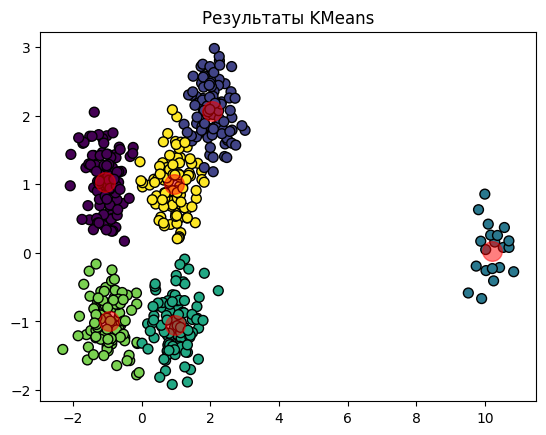

In [39]:
# Визуализация результатов кластеризации
plt.plot()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Результаты KMeans')

In [40]:
# Переназначение малых кластеров
labels = reassign_small_clusters(X, y_kmeans, 50)

# Проверка результатов
unique, counts = np.unique(labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} points")

Cluster 0: 98 points
Cluster 1: 120 points
Cluster 3: 100 points
Cluster 4: 99 points
Cluster 5: 103 points


Text(0.5, 1.0, 'Результаты после переназначения KMeans')

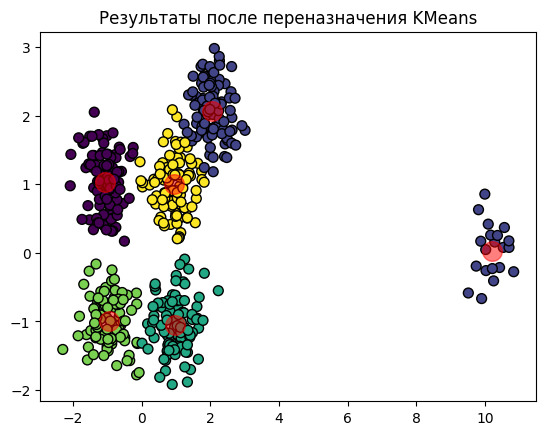

In [41]:
# Визуализация результатов кластеризации
plt.plot()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Результаты после переназначения KMeans')